Us_census Rows 60


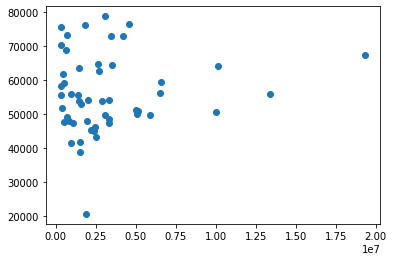

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'men_Pop', 'women_Pop'],
      dtype='object')
        State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0     Alabama   4830620       4.0   62.0   31.0     0.0    1.0      0.0   
1      Alaska    733375       6.0   61.0    3.0    16.0    5.0      1.0   
2     Arizona   6641928      30.0   57.0    4.0     4.0    3.0      0.0   
3    Arkansas   2958208       6.0   71.0   19.0     1.0    1.0      0.0   
4  California  38421464      37.0   40.0    6.0     0.0   13.0      0.0   

     Income            GenderPop   men_Pop   women_Pop  
0  43296.36    2341093M_2489527F   2341093   2489527.0  
1  70354.74      384160M_349215F    384160    349215.0  
2  54207.82    3299088M_3342840F   3299088   3342840.0  
3  41935.63    1451913M_1506295F   1451913   1506295.0  
4  67264.78  19087135M_19334329F  19087135  19334329.0  


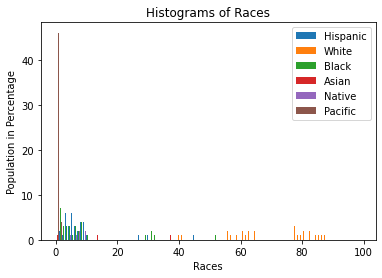

In [36]:
import pandas as pd
import numpy as np
import  re
import matplotlib.pyplot as plt

uri = "Q2_Pandas_Assignments"
fileNames = ['states0.csv','states1.csv','states2.csv','states3.csv','states4.csv','states5.csv','states6.csv','states7.csv','states8.csv','states9.csv']
dataframes = []
for i in range(len(fileNames)):
    url = '\\'.join([uri,fileNames[i]])
    dataframes.append(pd.read_csv(url,index_col=[0]))

# Merging all dataframes into one dataframe
us_census = pd.concat(dataframes,ignore_index=True)
print("Us_census Rows",len(us_census))

# Utility Functions
def to_string(val):
    """Converts the DataType of any Series to String"""
    return val.astype('string')

def col_in_proper_format(str_val):
    """Takes Pandas Series as argument and
        Changes the DataType to float
        return Pandas Series"""
    pat2='[$MF%]'
    # regex1 = re.compile(pat)
    if str_val[0].startswith('$'):
        str_val=to_string(str_val)
        result = str_val.str.split(pat2,expand=True)[1]
        result[result==""]='0' # Assign '0' value to empty string
        return np.round(result.astype('float'),2) # change the dtype to float and round of to two decimal points
    elif str_val[0].endswith('M') or str_val[0].endswith('F'):
        result = str_val.str.split(pat2,expand=True)[0]
        result[result==""]='0' # Assign '0' value to empty string
        result = result.astype('int64')
        result.replace(0,np.nan,inplace=True)
        return result
    elif str_val[0].endswith('%'):
        str_val=to_string(str_val)
        result = str_val.str.split(pat2,expand=True)[0]
        result[result==""]='0' # Assign '0' value to empty string
        return np.round(result.astype('float'),0) # change the dtype to float and round of to two decimal points

    
def col_splitter(combinedCol,separator):
    combinedCol = to_string(combinedCol)
    men = combinedCol.str.split(separator,expand=True)[0]
    women = combinedCol.str.split(separator,expand=True)[1]
    return men, women

us_census['men_Pop'],us_census['women_Pop'] = col_splitter(us_census.GenderPop,'_')
us_census.men_Pop = col_in_proper_format(us_census.men_Pop)
us_census.women_Pop = col_in_proper_format(us_census.women_Pop)
us_census.women_Pop.fillna(us_census.TotalPop-us_census.men_Pop,inplace=True)

us_census.Income = col_in_proper_format(us_census.Income)
us_census.drop_duplicates(keep ='first',inplace=True)
plt.scatter(us_census.women_Pop,us_census.Income)
plt.show()
print(us_census.columns)
us_census.Hispanic = col_in_proper_format(us_census.Hispanic)
us_census.White = col_in_proper_format(us_census.White)
us_census.Black = col_in_proper_format(us_census.Black)
us_census.Native = col_in_proper_format(us_census.Native)
us_census.Asian = col_in_proper_format(us_census.Asian)
us_census.Pacific = col_in_proper_format(us_census.Pacific)
us_census.Pacific.fillna(method = 'ffill',inplace=True)
histogram_data = [us_census.Hispanic,us_census.White,us_census.Black,us_census.Asian,us_census.Native,us_census.Pacific]
print(us_census.head())
# plt.figure(figsize=(150,100))
plt.title('Histograms of Races')
plt.xlabel('Races')
plt.ylabel('Population in Percentage')
plt.hist(histogram_data,bins=100,label=["Hispanic",'White','Black','Asian','Native','Pacific'],rwidth=.95,histtype='bar')
plt.legend(loc='best') # Positioning the legend
plt.show()


In [68]:
import numpy as np
import pandas as pd

inventory = pd.read_csv('Q2_Pandas_Assignments\inventory.csv')
staten_island=inventory[:10]
product_request = staten_island.product_description
condition = (inventory['location']=='Brooklyn') & (inventory['product_type']=='seeds')
seed_request = inventory[condition]
inventory['in_stock'] = inventory['quantity']>0
inventory['total_value'] = inventory['price'] * inventory['quantity']
combine_lambda = lambda row:'{0} - {1}'.format(row[1], row[2])
inventory['full_description'] = inventory.apply(combine_lambda,axis=1)
print(inventory.head(5))



        location  product_type product_description  quantity  price  in_stock  \
0  Staten Island         seeds               daisy         4   6.99      True   
1  Staten Island         seeds          calla lily        46  19.99      True   
2  Staten Island         seeds              tomato        85  13.99      True   
3  Staten Island  garden tools                rake         4  13.99      True   
4  Staten Island  garden tools         wheelbarrow         0  89.99     False   

   total_value            full_description  
0        27.96               seeds - daisy  
1       919.54          seeds - calla lily  
2      1189.15              seeds - tomato  
3        55.96         garden tools - rake  
4         0.00  garden tools - wheelbarrow  


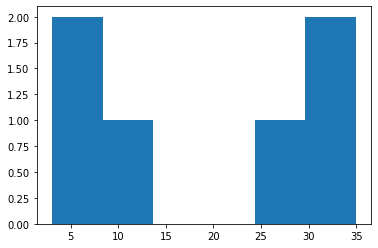